## A faire :
Ajouter explication sur le fait qu'il n'y a pas de data leakage (vérification des correlation dans l'EDA)

Ajouter lightGBM comme deuxième test de modèle.

Ajouter explications des différences entre CART et lightgbm

Ne prendre que les (7) variables les plus utiles (éviter que les gens ne doivent remplir trop de champs)

# Installing packages

In [ ]:
pip install scikit-learn

In [ ]:
pip install seaborn

In [ ]:
pip install joblib

In [ ]:
pip install lightgbm

# 1. Main packages import

In [1]:
# General Packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
import joblib

#Standard Scaler
from sklearn.preprocessing import StandardScaler

#KNN
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer

#LightGBM
from lightgbm import LGBMClassifier

#CART
from sklearn.tree import DecisionTreeClassifier

## SVM
from sklearn.svm import SVC

# 2. Data preparation

In [2]:
# Read the dataset from the CSV file
heart_disease = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

In [3]:
heart_disease.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
heart_disease[['GenHlth','Age','Stroke','Sex','HighChol','HighBP','Diabetes','PhysHlth','BMI','DiffWalk']]

,GenHlth,Age,Stroke,Sex,HighChol,HighBP,Diabetes,PhysHlth,BMI,DiffWalk
0,5.0,9.0,0.0,0.0,1.0,1.0,0.0,15.0,40.0,1.0
1,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0
2,5.0,9.0,0.0,0.0,1.0,1.0,0.0,30.0,28.0,1.0
3,2.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0,0.0
4,2.0,11.0,0.0,0.0,1.0,1.0,0.0,0.0,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...
253675,3.0,5.0,0.0,1.0,1.0,1.0,0.0,5.0,45.0,0.0
253676,4.0,11.0,0.0,0.0,1.0,1.0,2.0,0.0,18.0,1.0
253677,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0
253678,3.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,23.0,0.0


In [6]:
heart_disease[['GenHlth','Age','Stroke','Sex','HighChol','HighBP','Diabetes','PhysHlth','BMI','DiffWalk']].describe()

,GenHlth,Age,Stroke,Sex,HighChol,HighBP,Diabetes,PhysHlth,BMI,DiffWalk
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,2.511392,8.032119,0.040571,0.440342,0.424121,0.429001,0.296921,4.242081,28.382364,0.168224
std,1.068477,3.054220,0.197294,0.496429,0.494210,0.494934,0.698160,8.717951,6.608694,0.374066
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000
50%,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000
75%,3.000000,10.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,31.000000,0.000000
max,5.000000,13.000000,1.000000,1.000000,1.000000,1.000000,2.000000,30.000000,98.000000,1.000000


## 2.1 Standardisation and split into features and target label

In [2]:
def standardize_features(df):
    """
    Standardizes selected continuous feature columns in the dataframe.

    Parameters:
        df (pd.DataFrame): Input dataframe containing the dataset.

    Returns:
        df_standardized (pd.DataFrame): DataFrame with standardized continuous features.
        scaler (StandardScaler): Fitted StandardScaler object for further transformations.
    """
    # Define the columns to standardize
    continuous_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

    # Create a copy of the dataframe to avoid modifying the original data
    df_standardized = df.copy()

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Apply standardization to the selected continuous columns
    df_standardized[continuous_columns] = scaler.fit_transform(df_standardized[continuous_columns])

    return df_standardized, scaler


# Using the function on the dataset
if __name__ == "__main__":
    # Read the dataset from a CSV file
    heart_disease = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

    # Standardize the selected continuous features before splitting into features (X) and target (y)
    heart_disease_std, scaler = standardize_features(heart_disease)

    # Split data into features and target label
    X = heart_disease_std[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
                            'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
                            'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
                            'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
    y = heart_disease_std["HeartDiseaseorAttack"]

    # Display the first few rows of the features and target
    print(X.head())
    print(y.head())

   HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  Diabetes  \
0     1.0       1.0        1.0  1.757936     1.0     0.0       0.0   
1     0.0       0.0        0.0 -0.511806     1.0     0.0       0.0   
2     1.0       1.0        1.0 -0.057858     0.0     0.0       0.0   
3     1.0       0.0        1.0 -0.209174     0.0     0.0       0.0   
4     1.0       1.0        1.0 -0.663122     0.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost   GenHlth  \
0           0.0     0.0      1.0  ...            1.0          0.0  2.329121   
1           1.0     0.0      0.0  ...            0.0          1.0  0.457294   
2           0.0     1.0      0.0  ...            1.0          1.0  2.329121   
3           1.0     1.0      1.0  ...            1.0          0.0 -0.478619   
4           1.0     1.0      1.0  ...            1.0          0.0 -0.478619   

   MentHlth  PhysHlth  DiffWalk  Sex       Age  Education    Income  
0  1.998592  1.233999       1.0  0

## 2.2 Defining X_test and train, and Y_test and train

In [3]:
#Defining the proportion of data that will be used to verify the model = 30% of the data.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(177576, 21)
(76104, 21)
(177576,)
(76104,)


In [4]:
print(X_test.head())

        HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  Diabetes  \
244460     1.0       0.0        1.0 -1.419703     0.0     0.0       0.0   
249133     0.0       0.0        1.0  0.396091     0.0     0.0       0.0   
157586     0.0       0.0        1.0  0.850039     0.0     0.0       0.0   
79056      0.0       0.0        1.0 -0.057858     1.0     0.0       0.0   
110027     0.0       0.0        1.0 -0.965755     1.0     0.0       0.0   

        PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  \
244460           1.0     1.0      1.0  ...            1.0          0.0   
249133           1.0     1.0      1.0  ...            1.0          0.0   
157586           1.0     0.0      1.0  ...            1.0          0.0   
79056            1.0     0.0      0.0  ...            1.0          0.0   
110027           1.0     1.0      1.0  ...            1.0          0.0   

         GenHlth  MentHlth  PhysHlth  DiffWalk  Sex       Age  Education  \
244460 -1.414532 -0.429630 -

# 3. Classification models trials

## 3.1 KNN 

In [5]:
# Split Data into Training and Testing Sets with Stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


# Define a Custom Scoring Function
def custom_metric(y_true, y_pred):
    """
    Custom scoring function:
      - True Positives (TP): Correctly classified as at risk (+1 point each).
      - True Negatives (TN): Correctly classified as not at risk (+1 point each).
      - False Positives (FP): Incorrectly classified as at risk (-1 point each).
      - False Negatives (FN): Incorrectly classified as not at risk (-3 points each).

    This function is designed to penalize false negatives more heavily as missing a patient at risk is more critical.
    
    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.

    Returns:
        score (float): Score computed based on the custom metric.
    """
    cm = confusion_matrix(y_true, y_pred)
    # For binary classification, confusion_matrix returns:
    # [[TN, FP],
    #  [FN, TP]]
    TN, FP, FN, TP = cm.ravel()
    score = TP + TN - FP - 3 * FN
    return score

# Create a scorer using the custom_metric function.
# The scoring function is wrapped so that a higher value is considered better.
custom_scorer = make_scorer(custom_metric, greater_is_better=True)


# Define the KNN Model and Hyperparameters to Adjust
knn = neighbors.KNeighborsClassifier()

# For KNN, the hyperparameters that can be adjusted include:
#   - n_neighbors: the number of neighbors (k) to consider.
#   - weights: function used to weight the neighbors ('uniform' or 'distance').
#   - p: parameter for the Minkowski distance (p=1 for Manhattan, p=2 for Euclidean).
#   - algorithm: algorithm for computing nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute').
param_dist = {
    'n_neighbors': list(range(1, 101)),  # k values from 1 to 100.
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


# Set Up Stratified K-Fold Cross-Validation
# StratifiedKFold is used to ensure that each fold maintains the class distribution.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)


# Set Up Randomized Search with Multiple Scoring Metrics
# Here, we define a dictionary for the scoring parameter, including both the custom score and the usual 'accuracy'.
# The 'refit' parameter is set to 'custom_score' so that the best estimator is chosen based on the custom score.
random_search = RandomizedSearchCV(
    estimator=knn, 
    param_distributions=param_dist,
    n_iter=50,                      # Number of parameter settings sampled.
    scoring={'custom_score': custom_scorer, 'accuracy': 'accuracy'},
    refit='custom_score',           # Refit using the custom score.
    cv=cv,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit the RandomizedSearchCV on the training data.
random_search.fit(X_train, y_train)


# Output the Best Parameters and Corresponding Scores
print("\nBest Parameters based on the custom score:")
print(random_search.best_params_)
print("\nBest Custom Score:", random_search.best_score_)

# Additionally, evaluate the best estimator on the testing set to see its accuracy.
best_knn = random_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print("Test Accuracy of Best Estimator:", test_accuracy)


# Display a Summary of Hyperparameter Combinations and their Scores
# Convert the cv_results_ dictionary to a DataFrame for easier viewing.
results_df = pd.DataFrame(random_search.cv_results_)

# Select and display the following columns:
# - 'params': Dictionary of parameter settings.
# - 'mean_test_custom_score': Mean custom score over CV folds.
# - 'std_test_custom_score': Standard deviation of the custom score.
# - 'mean_test_accuracy': Mean accuracy over CV folds.
# - 'std_test_accuracy': Standard deviation of the accuracy.
display_columns = ['params', 'mean_test_custom_score', 'std_test_custom_score', 'mean_test_accuracy', 'std_test_accuracy']
print("\nSummary of Randomized Search Results:")
print(results_df[display_columns])


Training features shape: (177576, 21)
Testing features shape: (76104, 21)
Training target shape: (177576,)
Testing target shape: (76104,)
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters based on the custom score:
{'weights': 'uniform', 'p': 1, 'n_neighbors': 27, 'algorithm': 'kd_tree'}

Best Custom Score: 22598.4
Test Accuracy of Best Estimator: 0.9064569536423841

Summary of Randomized Search Results:
                                               params  mean_test_custom_score  \
0   {'weights': 'uniform', 'p': 2, 'n_neighbors': ...                 22456.0   
1   {'weights': 'uniform', 'p': 2, 'n_neighbors': ...                 22349.2   
2   {'weights': 'uniform', 'p': 1, 'n_neighbors': ...                 22543.6   
3   {'weights': 'distance', 'p': 2, 'n_neighbors':...                 22442.8   
4   {'weights': 'distance', 'p': 1, 'n_neighbors':...                 22502.0   
5   {'weights': 'uniform', 'p': 1, 'n_neighbors': ...                 22416.8

## 3.2 Light GBM

In [7]:
# Split Data into Training and Testing Sets with Stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


# Define a Custom Scoring Function
def custom_metric(y_true, y_pred):
    """
    Custom scoring function:
      - True Positives (TP): Correctly classified as at risk (+1 point each).
      - True Negatives (TN): Correctly classified as not at risk (+1 point each).
      - False Positives (FP): Incorrectly classified as at risk (-1 point each).
      - False Negatives (FN): Incorrectly classified as not at risk (-3 points each).

    This function is designed to penalize false negatives more heavily, as missing a patient at risk is more critical.
    
    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.

    Returns:
        score (float): Score computed based on the custom metric.
    """
    cm = confusion_matrix(y_true, y_pred)
    # For binary classification, confusion_matrix returns:
    # [[TN, FP],
    #  [FN, TP]]
    TN, FP, FN, TP = cm.ravel()
    score = TP + TN - FP - 3 * FN
    return score

# Create a scorer using the custom_metric function.
custom_scorer = make_scorer(custom_metric, greater_is_better=True)


# Define the LightGBM Model and Hyperparameters to Adjust
# Initialize the LightGBM classifier with a fixed random state for reproducibility.
lgbm = LGBMClassifier(random_state=24)

# Define the hyperparameter search space for LightGBM.
# Adjusted parameters include:
#   - n_estimators: Number of boosting iterations.
#   - max_depth: Maximum depth of each tree.
#   - learning_rate: Boosting learning rate.
#   - num_leaves: Maximum number of leaves in one tree.
#   - subsample: Fraction of samples to be used for fitting each tree.
#   - colsample_bytree: Fraction of features to consider when building each tree.
param_dist = {
    'n_estimators': list(range(50, 501, 50)),          # 50, 100, ..., 500 boosting iterations.
    'max_depth': list(range(3, 13)),                    # Values from 3 to 12.
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],     # Various learning rates.
    'num_leaves': list(range(20, 151, 10)),             # Number of leaves from 20 to 150 (step 10).
    'subsample': [0.7, 0.8, 0.9, 1.0],                  # Subsample ratios.
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]            # Feature sampling ratios.
}


# Set Up Stratified K-Fold Cross-Validation
# StratifiedKFold is used to ensure that each fold maintains the class distribution.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# ------------------------------
# Set Up Randomized Search with Multiple Scoring Metrics

# Define a dictionary for the scoring parameter, including both the custom score and standard accuracy.
# The 'refit' parameter is set to 'custom_score' so that the best estimator is chosen based on the custom score.
random_search = RandomizedSearchCV(
    estimator=lgbm, 
    param_distributions=param_dist,
    n_iter=50,                      # Number of parameter settings sampled.
    scoring={'custom_score': custom_scorer, 'accuracy': 'accuracy'},
    refit='custom_score',           # Refit the estimator based on the custom score.
    cv=cv,
    random_state=24,
    n_jobs=-1
)

# Fit the RandomizedSearchCV on the training data.
random_search.fit(X_train, y_train)


# Output the Best Parameters and Corresponding Scores
print("\nBest Parameters based on the custom score:")
print(random_search.best_params_)
print("\nBest Custom Score:", random_search.best_score_)

# Evaluate the best estimator on the testing set to see its accuracy.
best_lgbm = random_search.best_estimator_
test_accuracy = best_lgbm.score(X_test, y_test)
print("Test Accuracy of Best Estimator:", test_accuracy)


# Display a Summary of Hyperparameter Combinations and their Scores
# Convert the cv_results_ dictionary to a DataFrame for easier viewing.
results_df = pd.DataFrame(random_search.cv_results_)

# Select and display relevant columns:
# - 'params': The hyperparameter settings.
# - 'mean_test_custom_score': Mean custom score over CV folds.
# - 'std_test_custom_score': Standard deviation of the custom score.
# - 'mean_test_accuracy': Mean accuracy over CV folds.
# - 'std_test_accuracy': Standard deviation of the accuracy.
display_columns = ['params', 'mean_test_custom_score', 'std_test_custom_score', 'mean_test_accuracy', 'std_test_accuracy']
print("\nSummary of Randomized Search Results:")
print(results_df[display_columns])

Training features shape: (177576, 21)
Testing features shape: (76104, 21)
Training target shape: (177576,)
Testing target shape: (76104,)
[LightGBM] [Info] Number of positive: 13380, number of negative: 128681
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.603980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 142061, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094185 -> initscore=-2.263575
[LightGBM] [Info] Start training from score -2.263575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Exception ignored on calling ctypes callback function: <function _log_callback at 0x7f0a4877b7e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/lightgbm/basic.py", line 287, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 
Exception ignored on calling ctypes callback function: <function _log_callback at 0x7f61f29b77e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/lightgbm/basic.py", line 287, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 
Exception ignored on calling ctypes callback function: <function _log_callback at 0x7f79fe09b7e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/lightgbm/basic.py", line 287, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 


KeyboardInterrupt: 

### Other parameters

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer
import numpy as np


# Split Data into Training and Testing Sets with Stratification
# Note: X and y are assumed to be already defined after standardization.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


# Define a Custom Scoring Function
def custom_metric(y_true, y_pred):
    """
    Custom scoring function:
      - True Positives (TP): Correctly classified as at risk (+1 point each).
      - True Negatives (TN): Correctly classified as not at risk (+1 point each).
      - False Positives (FP): Incorrectly classified as at risk (-1 point each).
      - False Negatives (FN): Incorrectly classified as not at risk (-3 points each).

    This function is designed to penalize false negatives more heavily, as missing a patient at risk is more critical.
    
    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.

    Returns:
        score (float): Score computed based on the custom metric.
    """
    cm = confusion_matrix(y_true, y_pred)
    # For binary classification, confusion_matrix returns:
    # [[TN, FP],
    #  [FN, TP]]
    TN, FP, FN, TP = cm.ravel()
    score = TP + TN - FP - 3 * FN
    return score

# Create a scorer using the custom_metric function.
custom_scorer = make_scorer(custom_metric, greater_is_better=True)


# Define the LightGBM Model and Hyperparameters to Adjust
# Initialize the LightGBM classifier with a fixed random state for reproducibility.
lgbm = LGBMClassifier(random_state=24)

# Define the hyperparameter search space for LightGBM.
# Adjusted parameters include:
#   - n_estimators: Number of boosting iterations.
#   - max_depth: Maximum depth of each tree.
#   - learning_rate: Boosting learning rate.
#   - num_leaves: Maximum number of leaves in one tree.
#   - subsample: Fraction of samples to be used for fitting each tree.
#   - colsample_bytree: Fraction of features to consider when building each tree.

param_dist = {
    'n_estimators': list(range(50, 501, 50)),          # 50, 100, ..., 500 boosting iterations (step 50).
    'max_depth': list(range(3, 13)),                    # Values from 3 to 12.
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],     # Various learning rates.
    'num_leaves': list(range(20, 151, 10)),             # Number of leaves from 20 to 150 (step 10).
    'subsample': [0.7, 0.8, 0.9, 1.0],                  # Subsample ratios.
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],           # Feature sampling ratios.
    'min_split_gain': [0, 0.001, 0.01, 0.1],            # Lower thresholds to allow more splits.
    'min_child_samples': [5, 10, 20]                    # Allow splits with fewer samples per leaf.
}


# Set Up Stratified K-Fold Cross-Validation
# StratifiedKFold is used to ensure that each fold maintains the class distribution.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# ------------------------------
# Set Up Randomized Search with Multiple Scoring Metrics

# Define a dictionary for the scoring parameter, including both the custom score and standard accuracy.
# The 'refit' parameter is set to 'custom_score' so that the best estimator is chosen based on the custom score.
random_search = RandomizedSearchCV(
    estimator=lgbm, 
    param_distributions=param_dist,
    n_iter=50,                      # Number of parameter settings sampled.
    scoring={'custom_score': custom_scorer, 'accuracy': 'accuracy'},
    refit='custom_score',           # Refit the estimator based on the custom score.
    cv=cv,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV on the training data.
random_search.fit(X_train, y_train)


# Output the Best Parameters and Corresponding Scores
print("\nBest Parameters based on the custom score:")
print(random_search.best_params_)
print("\nBest Custom Score:", random_search.best_score_)

# Evaluate the best estimator on the testing set to see its accuracy.
best_lgbm = random_search.best_estimator_
test_accuracy = best_lgbm.score(X_test, y_test)
print("Test Accuracy of Best Estimator:", test_accuracy)


# Display a Summary of Hyperparameter Combinations and their Scores
# Convert the cv_results_ dictionary to a DataFrame for easier viewing.
results_df = pd.DataFrame(random_search.cv_results_)

# Select and display relevant columns:
# - 'params': The hyperparameter settings.
# - 'mean_test_custom_score': Mean custom score over CV folds.
# - 'std_test_custom_score': Standard deviation of the custom score.
# - 'mean_test_accuracy': Mean accuracy over CV folds.
# - 'std_test_accuracy': Standard deviation of the accuracy.
display_columns = ['params', 'mean_test_custom_score', 'std_test_custom_score', 'mean_test_accuracy', 'std_test_accuracy']
print("\nSummary of Randomized Search Results:")
print(results_df[display_columns])

Training features shape: (177576, 21)
Testing features shape: (76104, 21)
Training target shape: (177576,)
Testing target shape: (76104,)
[LightGBM] [Info] Number of positive: 13380, number of negative: 128680
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.985063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 142060, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094186 -> initscore=-2.263568
[LightGBM] [Info] Start training from score -2.263568
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 13380, number of negative: 128681
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096722 seconds.
You can set `force_row_wise=true` to remove the over

Exception ignored on calling ctypes callback function: <function _log_callback at 0x7faa8bcb37e0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/lightgbm/basic.py", line 287, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 


KeyboardInterrupt: 

After 83 minutes of training, still no results, I decided to stop the process and find out if another kind a classification model would work better 

## 3.3 CART (Decision Tree)

In [6]:
# Split Data into Training and Testing Sets with Stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=24)

# Define a Custom Scoring Function
def custom_metric(y_true, y_pred):
    """
    Custom scoring function for a binary classification problem:
      - True Positives (TP): Correctly classified as at risk (+1 point each).
      - True Negatives (TN): Correctly classified as not at risk (+1 point each).
      - False Positives (FP): Incorrectly classified as at risk (-1 point each).
      - False Negatives (FN): Incorrectly classified as not at risk (-3 points each).

    This metric penalizes false negatives more heavily, as missing a patient at risk is more critical.
    
    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.

    Returns:
        score (float): Computed score according to the custom metric.
    """
    cm = confusion_matrix(y_true, y_pred)
    # For binary classification, the confusion_matrix is of the form:
    # [[TN, FP],
    #  [FN, TP]]
    TN, FP, FN, TP = cm.ravel()
    score = TP + TN - FP - 3 * FN
    return score

# Wrap the custom_metric in a scorer so that a higher score is better.
custom_scorer = make_scorer(custom_metric, greater_is_better=True)

# ------------------------------
# Define the CART Model and Hyperparameters to Adjust
# ------------------------------
# Initialize the Decision Tree classifier (CART)
dt = DecisionTreeClassifier(random_state=24)

# Define the hyperparameter search space.
# Here, we tune parameters that affect the growth of the tree:
# - criterion: The function to measure the quality of a split ("gini" or "entropy").
# - max_depth: Maximum depth of the tree.
# - min_samples_split: Minimum number of samples required to split an internal node.
# - min_samples_leaf: Minimum number of samples required to be at a leaf node.
# - max_features: The number of features to consider when looking for the best split.
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(3, 21)),            # Try depths from 3 to 20.
    'min_samples_split': [2, 5, 10, 20],         # Minimum samples to split a node.
    'min_samples_leaf': [1, 2, 5, 10],           # Minimum samples in a leaf.
    'max_features': [None, 'sqrt', 'log2']       # Options for number of features used at each split.
}


# Set Up Stratified K-Fold Cross-Validation
# StratifiedKFold keeps the class distribution across folds.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Set Up Randomized Search with Multiple Scoring Metrics
# Define the scoring dictionary with both the custom metric and accuracy.
# The 'refit' parameter is set to 'custom_score', meaning that the best estimator is chosen based on the custom metric.
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=50,                      # Number of parameter settings to sample.
    scoring={'custom_score': custom_scorer, 'accuracy': 'accuracy'},
    refit='custom_score',
    cv=cv,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV to the training data.
random_search.fit(X_train, y_train)


# Output the Best Parameters and Corresponding Scores
print("\nBest Parameters based on the custom score:")
print(random_search.best_params_)
print("\nBest Custom Score:", random_search.best_score_)

# Evaluate the best estimator on the testing set using accuracy.
best_dt = random_search.best_estimator_
test_accuracy = best_dt.score(X_test, y_test)
print("Test Accuracy of Best Estimator:", test_accuracy)

# Display a Summary of Hyperparameter Combinations and Their Scores
# Convert the cv_results_ dictionary to a DataFrame for easier inspection.
results_df = pd.DataFrame(random_search.cv_results_)

# Define the columns to display.
display_columns = ['params', 'mean_test_custom_score', 'std_test_custom_score', 'mean_test_accuracy', 'std_test_accuracy']
print("\nSummary of Randomized Search Results:")
print(results_df[display_columns])



Best Parameters based on the custom score:
{'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': 8, 'criterion': 'gini'}

Best Custom Score: 22787.2
Test Accuracy of Best Estimator: 0.9071533690738989

Summary of Randomized Search Results:
                                               params  mean_test_custom_score  \
0   {'min_samples_split': 20, 'min_samples_leaf': ...                 22540.4   
1   {'min_samples_split': 5, 'min_samples_leaf': 1...                 22786.0   
2   {'min_samples_split': 2, 'min_samples_leaf': 2...                 22042.8   
3   {'min_samples_split': 10, 'min_samples_leaf': ...                 22308.0   
4   {'min_samples_split': 20, 'min_samples_leaf': ...                 22765.6   
5   {'min_samples_split': 20, 'min_samples_leaf': ...                 22135.2   
6   {'min_samples_split': 20, 'min_samples_leaf': ...                 22135.2   
7   {'min_samples_split': 2, 'min_samples_leaf': 1...                 22704.4   

## 3.4 SVM

In [ ]:
# Split Data into Training and Testing Sets with Stratification
# Define a Custom Scoring Function
def custom_metric(y_true, y_pred):
    """
    Custom scoring function for a binary classification problem:
      - True Positives (TP): Correctly classified as at risk (+1 point each).
      - True Negatives (TN): Correctly classified as not at risk (+1 point each).
      - False Positives (FP): Incorrectly classified as at risk (-1 point each).
      - False Negatives (FN): Incorrectly classified as not at risk (-3 points each).

    This function is designed to penalize false negatives more heavily.
    
    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.

    Returns:
        score (float): Score computed based on the custom metric.
    """
    cm = confusion_matrix(y_true, y_pred)
    # For binary classification, the confusion matrix is:
    # [[TN, FP],
    #  [FN, TP]]
    TN, FP, FN, TP = cm.ravel()
    score = TP + TN - FP - 3 * FN
    return score

# Wrap the custom_metric in a scorer (greater scores are better)
custom_scorer = make_scorer(custom_metric, greater_is_better=True)


# Define the SVM Model and Hyperparameters to Adjust
# Initialize the SVC model; data is assumed to be standardized.
svm = SVC(random_state=24)

# Define the parameter search space for SVM. Note that:
# - 'C' controls regularization.
# - 'kernel' specifies the type of kernel function used.
# - 'gamma' defines the kernel coefficient (relevant for 'rbf', 'poly', 'sigmoid').
# - 'degree' is used only for the 'poly' kernel.
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only relevant for the 'poly' kernel; ignored otherwise.
}


# Set Up Stratified K-Fold Cross-Validation
# StratifiedKFold ensures that each fold maintains the original class distribution.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Set Up Randomized Search with Multiple Scoring Metrics
# Define scoring for both the custom metric and standard accuracy.
# The best estimator will be selected based on the custom score.
random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_dist,
    n_iter=50,                      # Number of parameter settings to sample.
    scoring={'custom_score': custom_scorer, 'accuracy': 'accuracy'},
    refit='custom_score',           # Refit using the custom scoring function.
    cv=cv,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit the randomized search on the training data.
random_search.fit(X_train, y_train)


# Output the Best Parameters and Corresponding Scores
print("\nBest Parameters based on the custom score:")
print(random_search.best_params_)
print("\nBest Custom Score:", random_search.best_score_)

# Evaluate the best estimator on the testing set using accuracy.
best_svm = random_search.best_estimator_
test_accuracy = best_svm.score(X_test, y_test)
print("Test Accuracy of Best Estimator:", test_accuracy)


# Display a Summary of Hyperparameter Combinations and Their Scores
results_df = pd.DataFrame(random_search.cv_results_)

# Columns for displaying parameters and scores:
display_columns = ['params', 'mean_test_custom_score', 'std_test_custom_score', 'mean_test_accuracy', 'std_test_accuracy']
print("\nSummary of Randomized Search Results:")
print(results_df[display_columns])

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/opt/conda/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Taking more than 90 minutes and still didn't get a result.

## Classification model conclusions

The KNN and CART model have similar 'best performances' based on the custom score.
The best KNN has a custom score of 22598.4
The best CART has a custom score of 22787.2
The accuracy is good for both : 0,91 KNN and 0,91 for CART

Since the accuracy is very close, I will select the CART model which has a higher custom score (penalize false negatives more heavily as missing a patient at risk is more critical).

# 4. Identifying the most inmportant features for predictions

CART model best parameters :

Best Parameters based on the custom score:

{'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': 8, 'criterion': 'gini'}

Best Custom Score: 22787.2
Test Accuracy of Best Estimator: 0.9071533690738989

Accuracy cross-validation scores for each fold: [0.90711229 0.90699704 0.90649022 0.90646206 0.90589892]
Mean accuracy cross-validation score: 0.9065921041121362
Custom cross-validation scores for each fold: [22976 22863 22715 22759 22619]
Mean custom cross-validation score: 22786.4
Test set accuracy score: 0.9071533690738989
Test set custom score: 48854


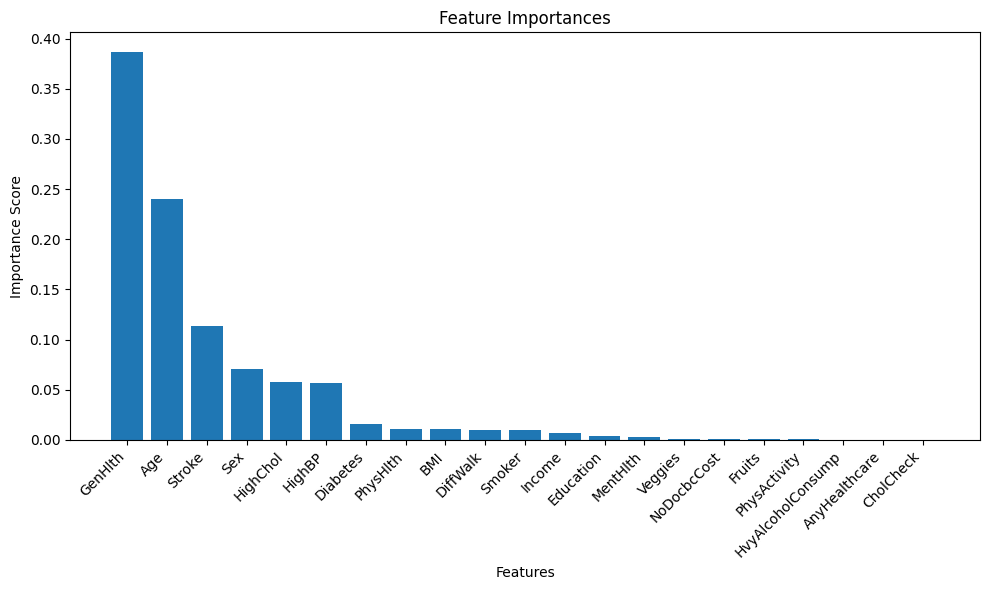

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=24)

# Define the custom scoring function
def custom_metric(y_true, y_pred):
    """
    Custom scoring function:
      - True Positives (TP): Correctly classified as at risk (+1 point each).
      - True Negatives (TN): Correctly classified as not at risk (+1 point each).
      - False Positives (FP): Incorrectly classified as at risk (-1 point each).
      - False Negatives (FN): Incorrectly classified as not at risk (-3 points each).

    This function is designed to penalize false negatives more heavily, as missing a patient at risk is more critical.
    
    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.

    Returns:
        score (float): Score computed based on the custom metric.
    """
    cm = confusion_matrix(y_true, y_pred)
    # For binary classification, confusion_matrix returns:
    # [[TN, FP],
    #  [FN, TP]]
    TN, FP, FN, TP = cm.ravel()
    score = TP + TN - FP - 3 * FN
    return score

# Create a custom scorer using make_scorer to use during cross-validation
custom_scorer = make_scorer(custom_metric)

# Create the CART model with the specified hyperparameters
model = DecisionTreeClassifier(
    min_samples_split=10,  # Minimum samples required to split an internal node
    min_samples_leaf=10,    # Minimum samples required at a leaf node
    max_features=None,     # All features are considered when finding the best split
    max_depth=8,           # Maximum depth of the tree
    criterion='gini'       # Using Gini impurity to measure the quality of a split
)

# Set up a StratifiedKFold cross-validation scheme (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using accuracy as the scoring metric
accuracy_cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
print("Accuracy cross-validation scores for each fold:", accuracy_cv_scores)
print("Mean accuracy cross-validation score:", accuracy_cv_scores.mean())

# Perform cross-validation using the custom scoring function
custom_cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring=custom_scorer)
print("Custom cross-validation scores for each fold:", custom_cv_scores)
print("Mean custom cross-validation score:", custom_cv_scores.mean())

# Fit the model on the full training set after cross-validation
model.fit(X_train, y_train)

# Evaluate the model on the test set using accuracy
test_accuracy = model.score(X_test, y_test)
print("Test set accuracy score:", test_accuracy)

# Evaluate the model on the test set using the custom scoring function
y_pred_test = model.predict(X_test)
test_custom_score = custom_metric(y_test, y_pred_test)
print("Test set custom score:", test_custom_score)

# Display the feature importances
importances = model.feature_importances_

# Determine feature names: if X_train is a DataFrame, use its column names; otherwise, create generic names.
try:
    feature_names = X_train.columns
except AttributeError:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.show()

I would like to propose this model on a website through an API, since people will have to fill the values that will be sent to the model, I will only keep the 10 most important features to avoind having to fill a lot of fields.

# 5. Adapting the model with the selected features

In [ ]:
continuous_columns = ['BMI', 'GenHlth', 'PhysHlth', 'Age']

In [12]:
X = heart_disease_std[['GenHlth','Age','Stroke','Sex','HighChol','HighBP','Diabetes','PhysHlth','BMI','DiffWalk']]
y = heart_disease_std["HeartDiseaseorAttack"]

# Display the first few rows of the features and target
print(X.head())
print(y.head())

    GenHlth       Age  Stroke  Sex  HighChol  HighBP  Diabetes  PhysHlth  \
0  2.329121  0.316900     0.0  0.0       1.0     1.0       0.0  1.233999   
1  0.457294 -0.337933     0.0  0.0       0.0     0.0       0.0 -0.486592   
2  2.329121  0.316900     0.0  0.0       1.0     1.0       0.0  2.954590   
3 -0.478619  0.971733     0.0  0.0       0.0     1.0       0.0 -0.486592   
4 -0.478619  0.971733     0.0  0.0       1.0     1.0       0.0 -0.486592   

        BMI  DiffWalk  
0  1.757936       1.0  
1 -0.511806       0.0  
2 -0.057858       1.0  
3 -0.209174       0.0  
4 -0.663122       0.0  
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: HeartDiseaseorAttack, dtype: float64


Accuracy cross-validation scores for each fold: [0.90778804 0.9070252  0.90739124 0.90694073 0.90632127]
Mean accuracy cross-validation score: 0.9070932969841522
Custom cross-validation scores for each fold: [22864 22803 22857 22879 22727]
Mean custom cross-validation score: 22826.0
Test set accuracy score: 0.9069431304530642
Test set custom score: 48886


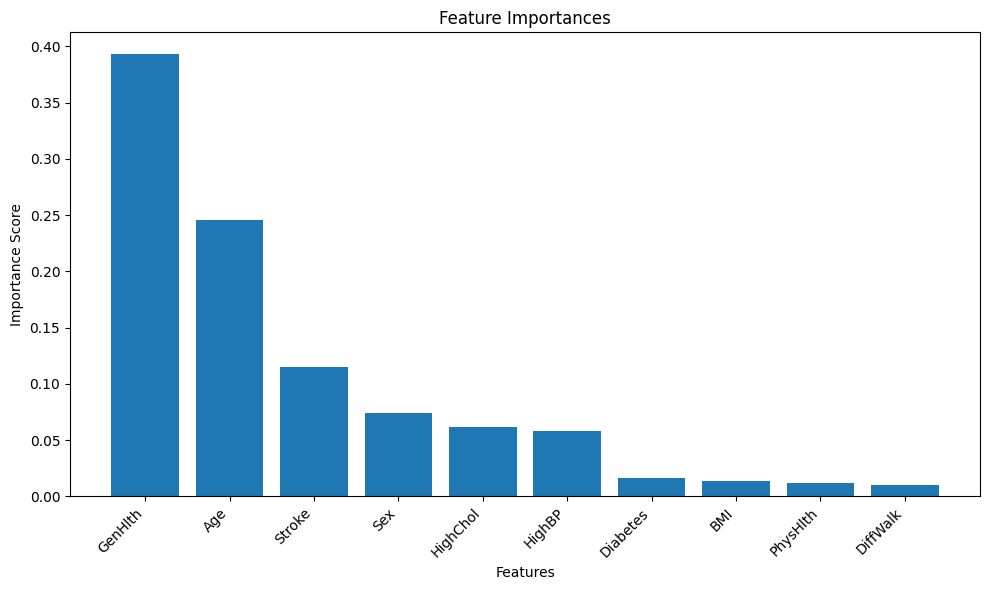

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=24)

# Define the custom scoring function
def custom_metric(y_true, y_pred):
    """
    Custom scoring function:
      - True Positives (TP): Correctly classified as at risk (+1 point each).
      - True Negatives (TN): Correctly classified as not at risk (+1 point each).
      - False Positives (FP): Incorrectly classified as at risk (-1 point each).
      - False Negatives (FN): Incorrectly classified as not at risk (-3 points each).

    This function is designed to penalize false negatives more heavily, as missing a patient at risk is more critical.
    
    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.

    Returns:
        score (float): Score computed based on the custom metric.
    """
    cm = confusion_matrix(y_true, y_pred)
    # For binary classification, confusion_matrix returns:
    # [[TN, FP],
    #  [FN, TP]]
    TN, FP, FN, TP = cm.ravel()
    score = TP + TN - FP - 3 * FN
    return score

# Create a custom scorer using make_scorer to use during cross-validation
custom_scorer = make_scorer(custom_metric)

# Create the CART model with the specified hyperparameters
model = DecisionTreeClassifier(
    min_samples_split=10,  # Minimum samples required to split an internal node
    min_samples_leaf=10,    # Minimum samples required at a leaf node
    max_features=None,     # All features are considered when finding the best split
    max_depth=8,           # Maximum depth of the tree
    criterion='gini'       # Using Gini impurity to measure the quality of a split
)

# Set up a StratifiedKFold cross-validation scheme (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using accuracy as the scoring metric
accuracy_cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
print("Accuracy cross-validation scores for each fold:", accuracy_cv_scores)
print("Mean accuracy cross-validation score:", accuracy_cv_scores.mean())

# Perform cross-validation using the custom scoring function
custom_cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring=custom_scorer)
print("Custom cross-validation scores for each fold:", custom_cv_scores)
print("Mean custom cross-validation score:", custom_cv_scores.mean())

# Fit the model on the full training set after cross-validation
model.fit(X_train, y_train)

# Evaluate the model on the test set using accuracy
test_accuracy = model.score(X_test, y_test)
print("Test set accuracy score:", test_accuracy)

# Evaluate the model on the test set using the custom scoring function
y_pred_test = model.predict(X_test)
test_custom_score = custom_metric(y_test, y_pred_test)
print("Test set custom score:", test_custom_score)

# Display the feature importances
importances = model.feature_importances_

# Determine feature names: if X_train is a DataFrame, use its column names; otherwise, create generic names.
try:
    feature_names = X_train.columns
except AttributeError:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.show()